**Bank Marketing**

In [ ]:
#Aim of the project=The aim is to predict if a client will subscribe to the bank term deposit (yes/no) in Python using Machine Learning

In [ ]:
import pandas as pd # data analysis and data handling
import numpy as np  # numerical calculation
import matplotlib.pyplot as plt # visulization
import seaborn as sns # advanced visualization

In [ ]:
#ignore the warnings by importing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing data set from excel
data=pd.read_csv("/content/Bank Marketing.csv")

In [ ]:
data.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
28229,25,student,single,high.school,no,yes,no,cellular,aug,mon,100,8,4,1,success,no
28341,30,admin.,single,university.degree,no,yes,yes,cellular,may,mon,22,3,999,0,nonexistent,no


By using sample we can take randomly 2 rows from the given dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


by using info we can get informatiom of the dataset such as datatypes,nullvalues,column names,number of rows and columns

In [ ]:
data.duplicated().sum()

8

we can find sum of duplicated values

In [ ]:
data.duplicated().value_counts()

False    32942
True         8
dtype: int64

we can get the duplicated count from data set

In [ ]:
data.drop_duplicates(inplace=True)

dropping the duplicated values

In [ ]:
data.duplicated().sum()

0

hence duplicates are removed

In [ ]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

no null values we can continue further steps.

In [ ]:
data=data.rename(columns={'y':'deposit'})
# rename the target column name 'y' to 'deposit' for easy understanding

In [ ]:
#convert categorical target  column  to numerical column i.e(yes:1 indicates subscribed for deposit term and no:0 indicates not subscribed for deposit term)
data.deposit=data.deposit.map({'yes':1,'no':0}).astype("int")

*Summary Statistics for Numeric Columns:*

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,deposit
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762,0.112683
std,10.403035,258.995259,2.752579,187.973035,0.499078,0.316210
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.000000


In [ ]:
#pdays mean is more compared to all . maximum  duration is more compared to all

*Frequency Tables for Categorical Columns:*

In [ ]:
for col in data.select_dtypes(include='object').columns:
  print(col,":")
  print(data[col].value_counts())
  print()

job :
admin.           8312
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

marital :
married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64

education :
university.degree      9733
high.school            7594
basic.9y               4826
professional.course    4191
basic.4y               3322
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64

default :
no         26000
unknown     6939
yes            3
Name: default, dtype: int64

housing :
yes        17251
no         14895
unknown      796
Name: housing, dtype: int64

loan :
no         27123
yes         5023
unknown      796
Name: loan, dtype: int64

contact :
cellular     20903
telephone    12039
Name: contact, 

Customer Segmentation:

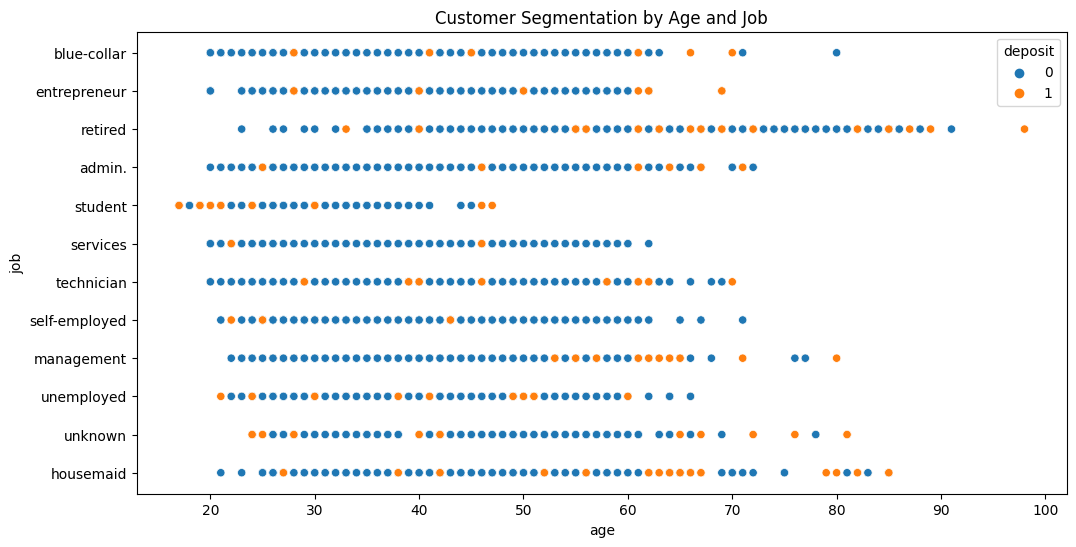

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='job', hue='deposit', data=data)
plt.title('Customer Segmentation by Age and Job')
plt.show()

above graph shows housemaid and management job holders are depositing at the age of 60-70

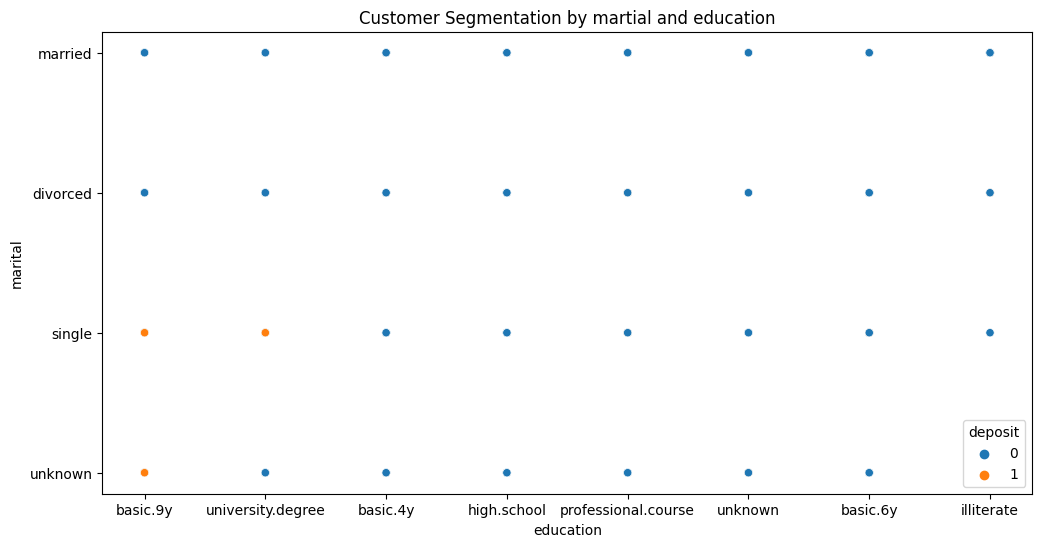

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y='marital', x='education', hue='deposit', data=data)
plt.title('Customer Segmentation by martial and education')
plt.show()

above graph shows singles who study basic.9y  and university.degree deposited .unkown who studied basic.9y  deposited.

*Response Rate Analysis:*

In [ ]:
data["deposit"].value_counts()

0    29230
1     3712
Name: deposit, dtype: int64

In [ ]:
response_rate = data['deposit'].value_counts(normalize=True) * 100
print(f"Response Rate:\n{response_rate}")


Response Rate:
0    88.73171
1    11.26829
Name: deposit, dtype: float64


In [ ]:
# by observing above output we  get that not subcribed deposit are 88% more than the subcribed deposit.
# it means imbalanced data set

*Churn Analysis:*

In [ ]:
# Assuming 'churn' is a binary variable indicating whether a customer churned
churn_analysis = data.groupby('poutcome')['previous', 'deposit'].mean()
print("\nChurn Analysis:\n", churn_analysis)



Churn Analysis:
              previous   deposit
poutcome                       
failure      1.171187  0.144065
nonexistent  0.000000  0.088039
success      1.575566  0.648869


by observation success rate of previous deposits are more than the present deposits.

graphical

<Axes: >

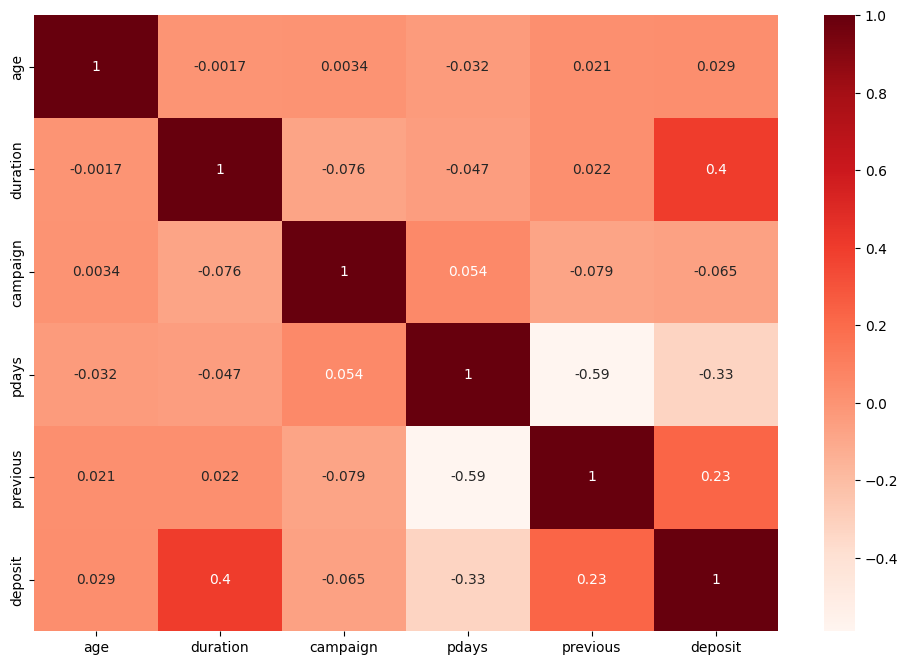

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap="Reds",annot=True)

by observation of heat map most of the features are not correlated,only duration and deposit  features are correlated more than all features

Text(0.5, 1.0, 'Age Count Distribution')

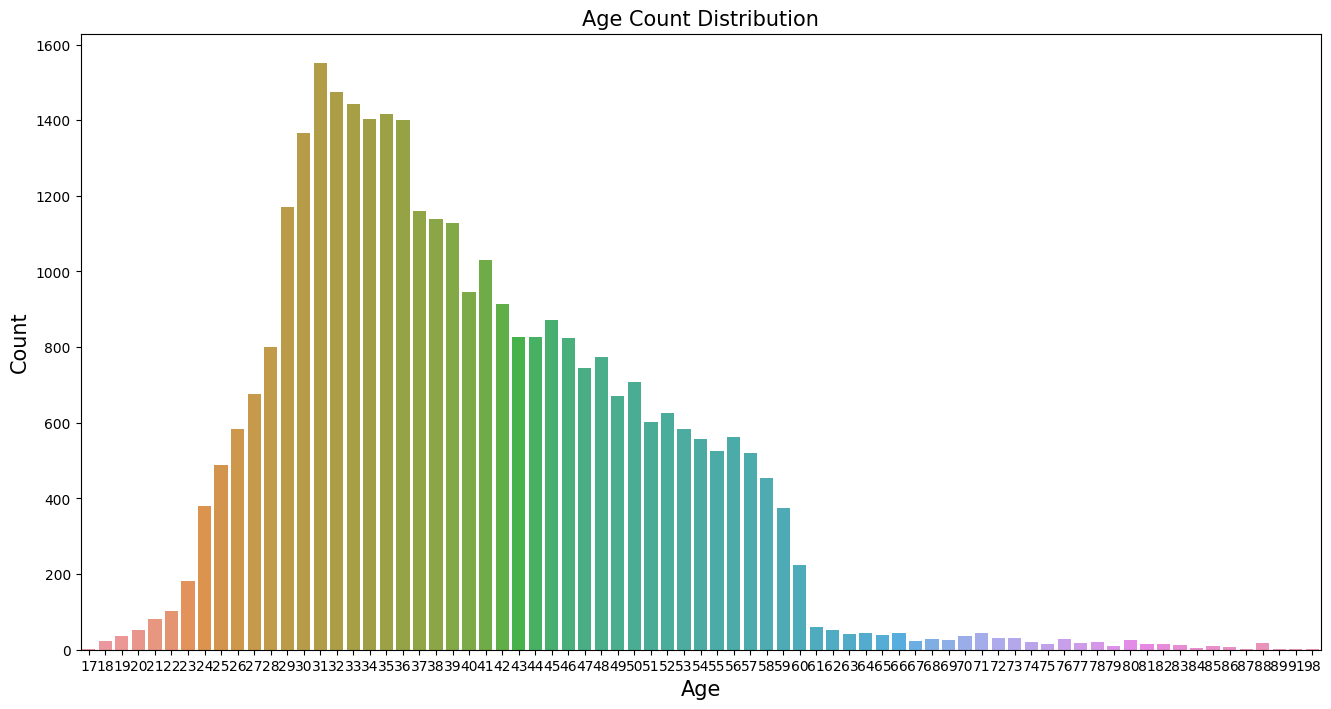

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'age', data =data)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)

In [ ]:
# above  shows 31  age people count is more.

<Axes: xlabel='job', ylabel='duration'>

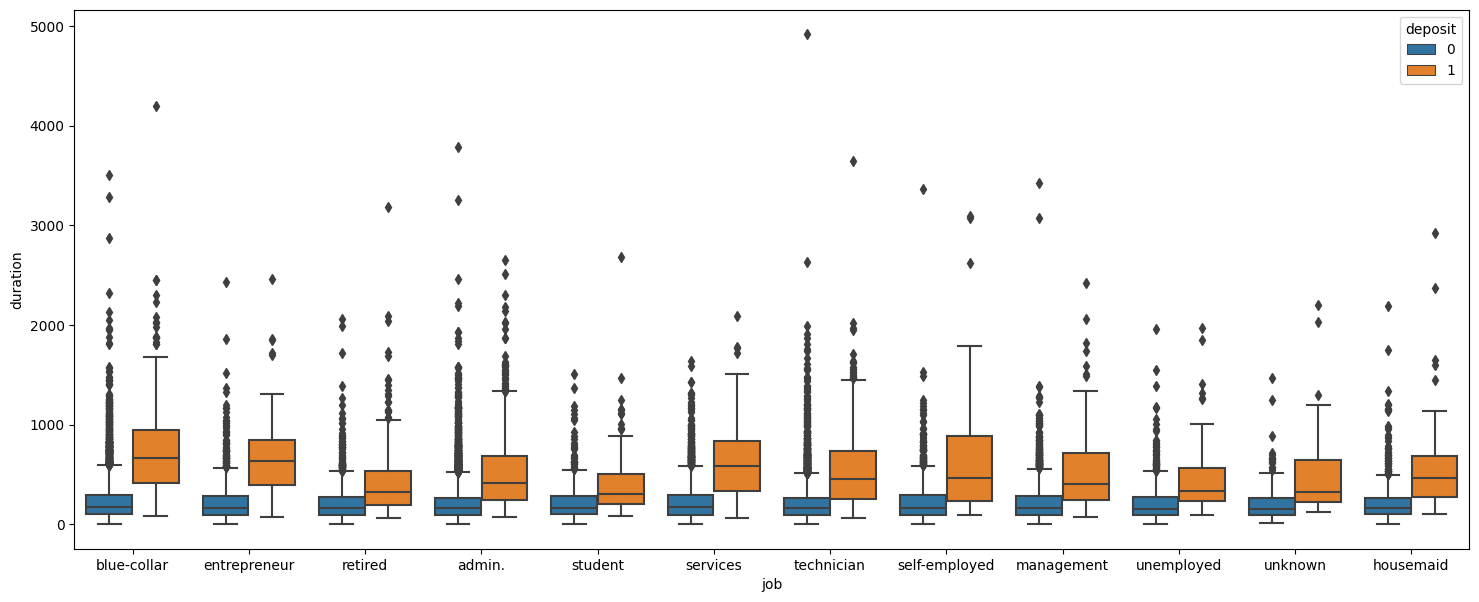

In [ ]:
plt.figure(figsize = (18, 7))
sns.boxplot(data=data, x="job", y='duration', hue="deposit")

On average, the duration of  deposit  of blue-collar,entrepreneur,services,self-employed job professions are more than other job professions.

<Axes: xlabel='job', ylabel='count'>

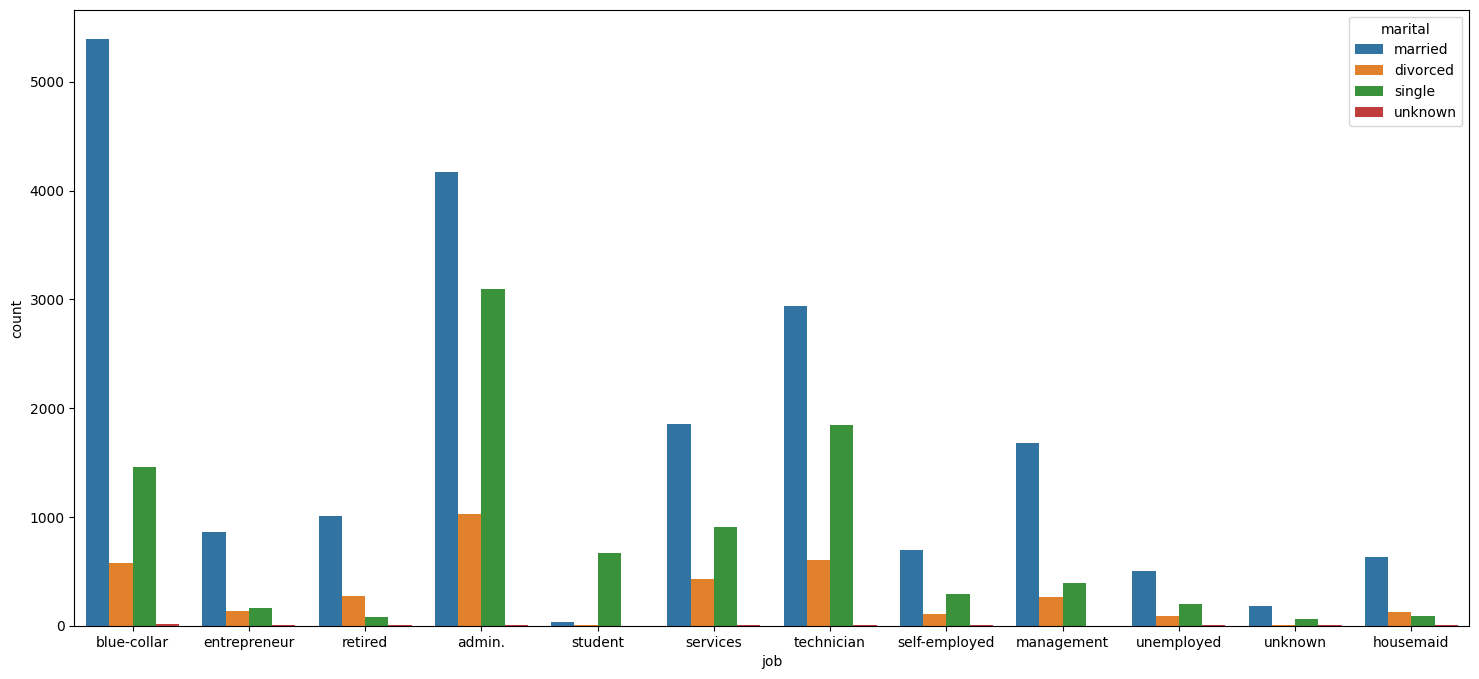

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x="job",hue="marital",data=data)

In [ ]:
#married peoples are doing more blue-collar jobs.
# singles and divorced peoples are doing more admin jobs.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'entrepreneur'),
  Text(2, 0, 'retired'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'student'),
  Text(5, 0, 'services'),
  Text(6, 0, 'technician'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'management'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'housemaid')])

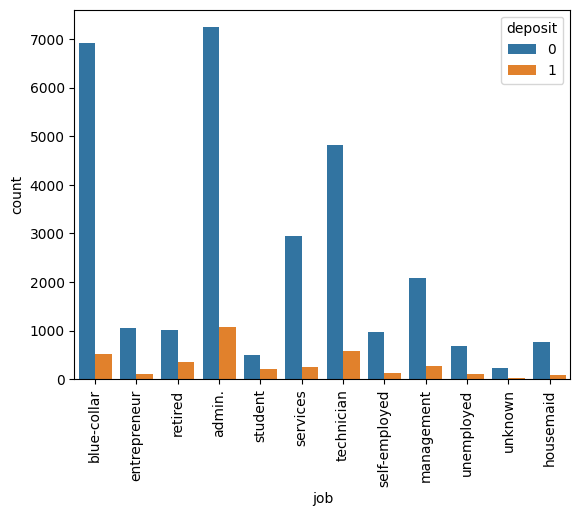

In [ ]:
sns.countplot(x="job",hue="deposit",data=data)
plt.xticks(rotation=90)

In [ ]:
#admin job people are taking more subscriptions

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'divorced'),
  Text(2, 0, 'single'),
  Text(3, 0, 'unknown')])

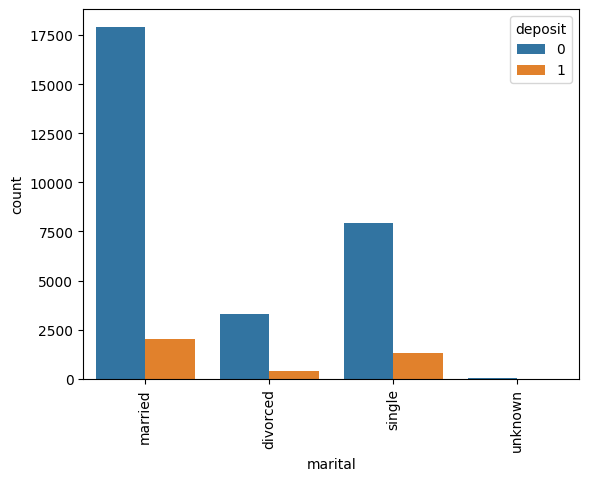

In [ ]:
sns.countplot(x="marital",hue="deposit",data=data)

plt.xticks(rotation=90)

In [ ]:
#married people are taking more subscriptions

<Axes: xlabel='previous', ylabel='count'>

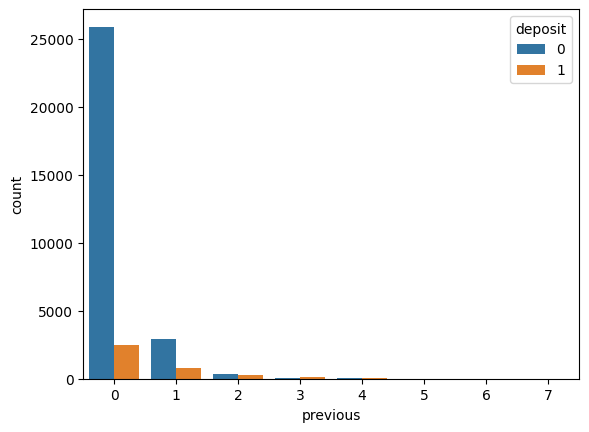

In [ ]:
sns.countplot(x = 'previous',hue="deposit", data = data)

In [ ]:
# 0 number of contacts made with the client before the current marketing campaign are taking more subscriptions.

<Axes: xlabel='poutcome', ylabel='count'>

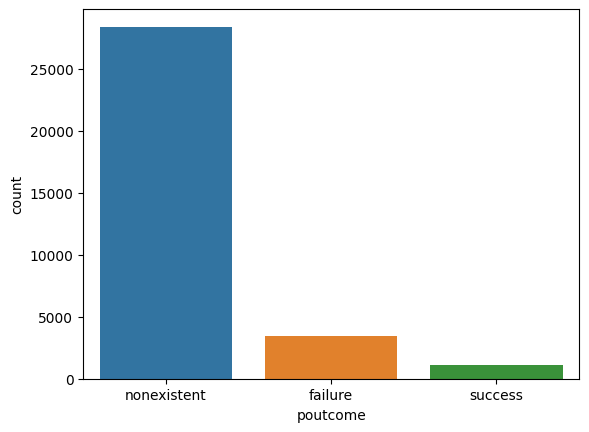

In [ ]:
sns.countplot(x = 'poutcome',data = data)


In [ ]:
# the outcome of the previous marketing campaign non existent count is more

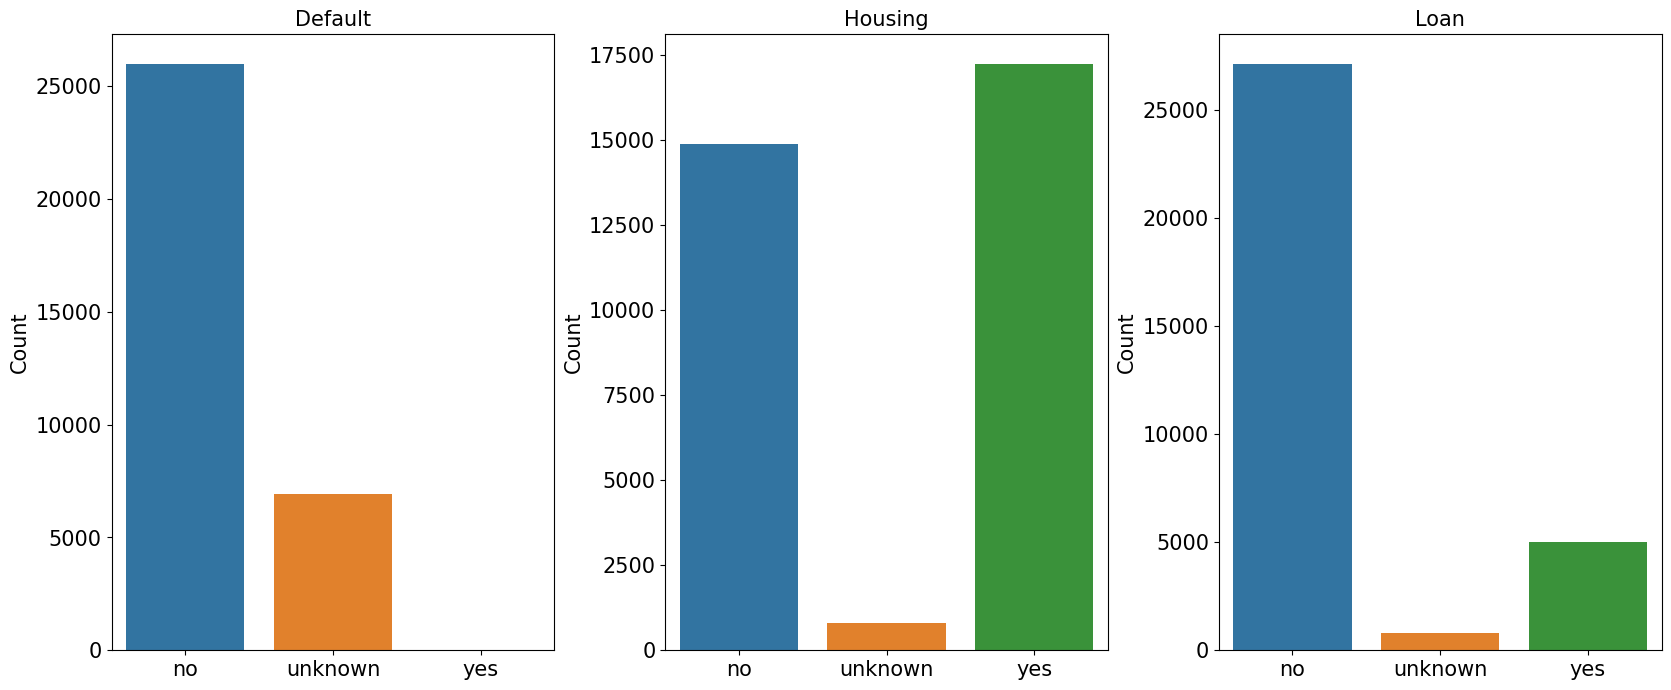

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = data, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = data, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [ ]:
# house loans are taken more

In [ ]:
#sns.pairplot(data,hue='deposit',palette='bwr')

In [ ]:
print("categorical columns are:")
l_object=[]
for col in data.select_dtypes(include='object').columns:
  l_object.append(col)
print(l_object,end="")# only columns will pint

categorical columns are:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

*onehot encoding*

In [ ]:
data=pd.get_dummies(data,columns=l_object)
data

,age,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,999,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36,120,2,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32947,54,131,4,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32948,29,165,1,999,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


by using one hot encoding category columnms are converted into integer columns

**LogisticRegression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score

# Assuming 'X' contains features and 'y' is the target variable
X = data.drop('deposit', axis=1)
y = data['deposit']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 85.26331765062983

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      5815
           1       0.43      0.83      0.57       774

    accuracy                           0.85      6589
   macro avg       0.70      0.84      0.74      6589
weighted avg       0.91      0.85      0.87      6589


Precision: 43.34009465855308

Recall: 82.81653746770026

F1_score: 56.90190856635597

confusion matrix:
[[4977  838]
 [ 133  641]]


**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score

# Assuming 'X' contains features and 'y' is the target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = DecisionTreeClassifier(class_weight='balanced',criterion="entropy",max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 88.01032023068751

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      5815
           1       0.49      0.61      0.55       774

    accuracy                           0.88      6589
   macro avg       0.72      0.77      0.74      6589
weighted avg       0.89      0.88      0.89      6589


Precision: 49.17355371900827

Recall: 61.49870801033591

F1_score: 54.649827784156145

[[5323  492]
 [ 298  476]]


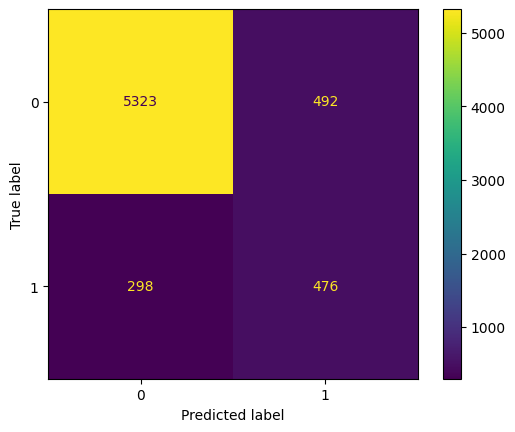

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(cm)
disp.plot()

[Text(0.5, 0.875, 'x[1] <= 205.5\nentropy = 1.0\nsamples = 26353\nvalue = [13176.5, 13176.5]'),
 Text(0.25, 0.625, 'x[3] <= 512.0\nentropy = 0.748\nsamples = 14839\nvalue = [8075.284, 2193.093]'),
 Text(0.125, 0.375, 'x[1] <= 125.5\nentropy = 0.619\nsamples = 362\nvalue = [120.426, 663.758]'),
 Text(0.0625, 0.125, 'entropy = 0.938\nsamples = 140\nvalue = [64.152, 116.606]'),
 Text(0.1875, 0.125, 'entropy = 0.447\nsamples = 222\nvalue = [56.274, 547.152]'),
 Text(0.375, 0.375, 'x[1] <= 93.5\nentropy = 0.637\nsamples = 14477\nvalue = [7954.858, 1529.335]'),
 Text(0.3125, 0.125, 'entropy = 0.187\nsamples = 5702\nvalue = [3196.912, 94.182]'),
 Text(0.4375, 0.125, 'entropy = 0.781\nsamples = 8775\nvalue = [4757.946, 1435.153]'),
 Text(0.75, 0.625, 'x[1] <= 521.5\nentropy = 0.901\nsamples = 11514\nvalue = [5101.216, 10983.407]'),
 Text(0.625, 0.375, 'x[3] <= 513.0\nentropy = 0.99\nsamples = 8643\nvalue = [4195.209, 5328.006]'),
 Text(0.5625, 0.125, 'entropy = 0.231\nsamples = 480\nvalue = [6

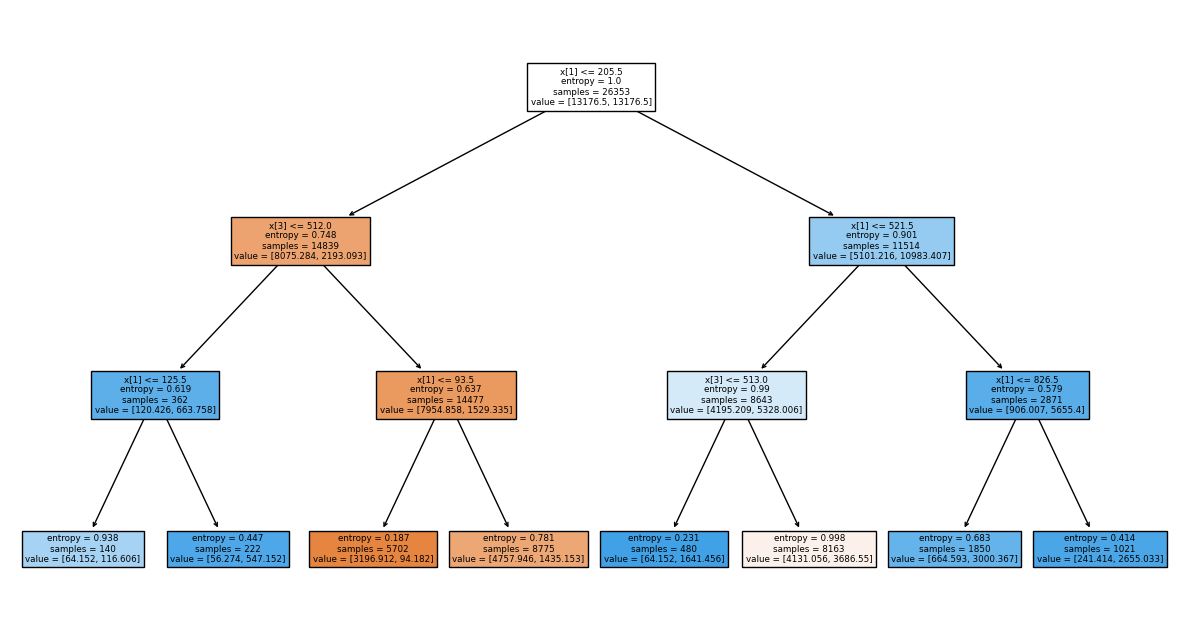

In [ ]:
#to show tree diagram
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(model,filled=True)

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score

# Assuming 'X' contains features and 'y' is the target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 89.83153741083623

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5815
           1       0.64      0.30      0.41       774

    accuracy                           0.90      6589
   macro avg       0.78      0.64      0.68      6589
weighted avg       0.88      0.90      0.88      6589


Precision: 64.20765027322405

Recall: 30.361757105943155

F1_score: 41.228070175438596

confusion matrix:
[[5684  131]
 [ 539  235]]


In [ ]:
# view the feature scores

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

duration                         3.576170e-01
age                              8.858736e-02
campaign                         3.951804e-02
pdays                            3.201694e-02
poutcome_success                 2.351751e-02
contact_telephone                2.064463e-02
month_may                        1.955169e-02
previous                         1.912680e-02
contact_cellular                 1.715646e-02
month_oct                        1.634117e-02
month_mar                        1.566692e-02
poutcome_nonexistent             1.518496e-02
month_jun                        1.329514e-02
month_apr                        1.198066e-02
housing_yes                      1.170814e-02
day_of_week_mon                  1.151090e-02
housing_no                       1.150816e-02
day_of_week_thu                  1.118578e-02
day_of_week_fri                  1.108300e-02
education_university.degree      1.105737e-02
month_jul                        1.100215e-02
day_of_week_tue                  1

<Axes: xlabel='age', ylabel='duration'>

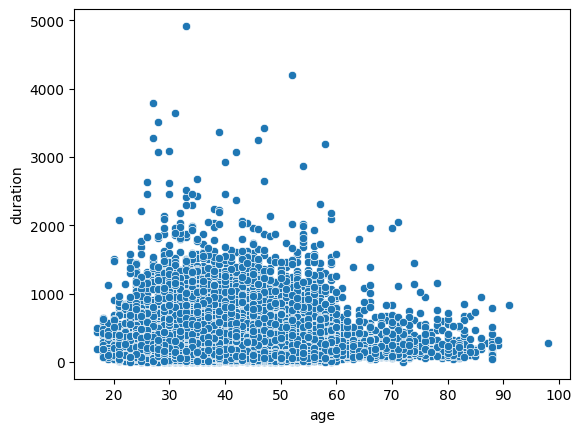

In [ ]:
sns.scatterplot(x="age",y="duration",data=data)

In [ ]:
 #the last contact with the clients duration between 0-1500 (in seconds) is more.

**AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =AdaBoostClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 89.69494612232509

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5815
           1       0.61      0.34      0.44       774

    accuracy                           0.90      6589
   macro avg       0.76      0.66      0.69      6589
weighted avg       0.88      0.90      0.88      6589


Precision: 61.02088167053365

Recall: 33.97932816537468

F1_score: 43.651452282157685

confusion matrix:
[[5647  168]
 [ 511  263]]


**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 90.48414023372288

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5815
           1       0.65      0.41      0.50       774

    accuracy                           0.90      6589
   macro avg       0.79      0.69      0.72      6589
weighted avg       0.89      0.90      0.89      6589


Precision: 65.28066528066529

Recall: 40.56847545219638

F1_score: 50.039840637450204

confusion matrix:
[[5648  167]
 [ 460  314]]


Text(50.722222222222214, 0.5, 'Actual value')

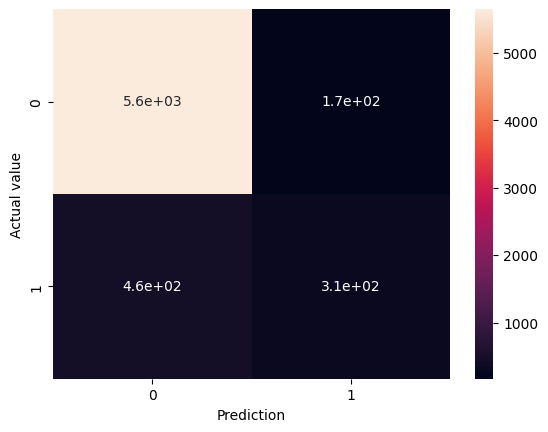

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.xlabel("Prediction")
plt.ylabel("Actual value")

In [ ]:
# predictive values are (5648+314) and  false values are (460+167)

**XGBoost Model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 90.16542722719684

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      5815
           1       0.61      0.44      0.51       774

    accuracy                           0.90      6589
   macro avg       0.77      0.70      0.73      6589
weighted avg       0.89      0.90      0.89      6589


Precision: 61.496350364963504

Recall: 43.54005167958656

F1_score: 50.983358547655065

confusion matrix:
[[5604  211]
 [ 437  337]]


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 89.81636060100166

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      5815
           1       0.65      0.30      0.41       774

    accuracy                           0.90      6589
   macro avg       0.78      0.64      0.67      6589
weighted avg       0.88      0.90      0.88      6589


Precision: 64.50704225352113

Recall: 29.58656330749354

F1_score: 40.56687333923826

confusion matrix:
[[5689  126]
 [ 545  229]]


**Naive_Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 86.28016390954622

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5815
           1       0.42      0.45      0.43       774

    accuracy                           0.86      6589
   macro avg       0.67      0.68      0.68      6589
weighted avg       0.87      0.86      0.86      6589


Precision: 42.073170731707314

Recall: 44.57364341085272

F1_score: 43.287327478042656

confusion matrix:
[[5340  475]
 [ 429  345]]


*** k-nearest neighbors model***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,recall_score,f1_score
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model =KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"\nAccuracy: {accuracy}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate precision
precision = precision_score(y_test, y_pred)*100
print(f"\nPrecision: {precision}")

# Calculate recall
recall_score = recall_score(y_test, y_pred)*100
print(f"\nRecall: {recall_score}")

# Calculate f1-score
f1_score = f1_score(y_test, y_pred)*100
print(f"\nF1_score: {f1_score}")
print()

#confusion matrix
print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Accuracy: 89.28517225679163

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5815
           1       0.57      0.36      0.44       774

    accuracy                           0.89      6589
   macro avg       0.74      0.66      0.69      6589
weighted avg       0.88      0.89      0.88      6589


Precision: 57.05394190871369

Recall: 35.5297157622739

F1_score: 43.78980891719745

confusion matrix:
[[5608  207]
 [ 499  275]]


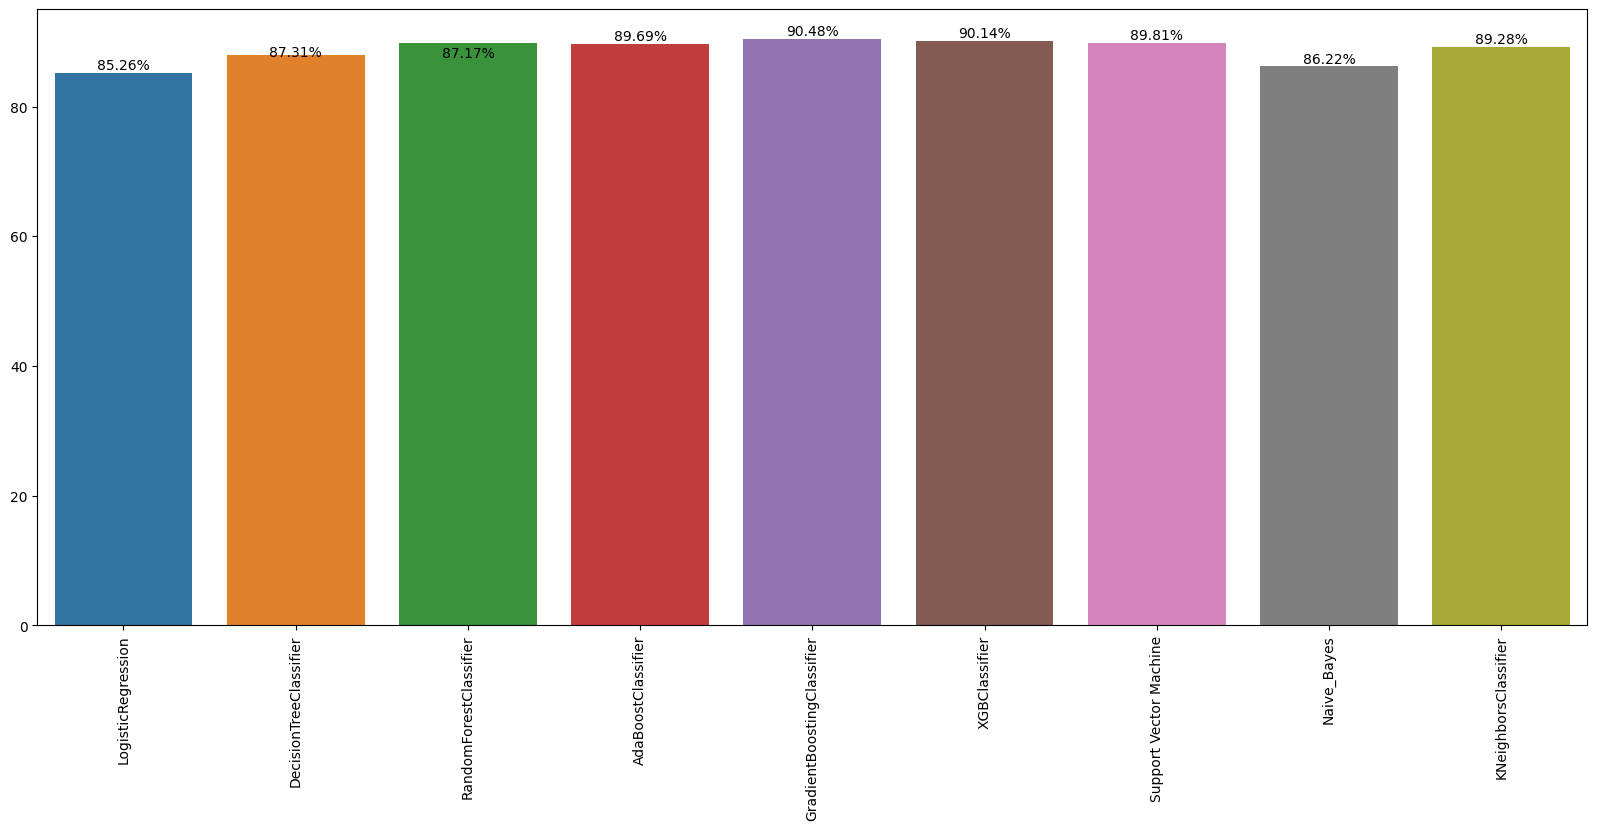

In [ ]:
plt.figure(figsize=(20,8))
x=['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','Support Vector Machine','Naive_Bayes','KNeighborsClassifier']
sns.barplot(x=x,y=[85.26, 88.01,89.78, 89.69, 90.48,90.14,89.81,86.22,89.28],data=data)
percentages=[85.26, 87.31,87.17, 89.69, 90.48,90.14,89.81,86.22,89.28]
plt.xticks(rotation=90)
#Display percentages on each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.show()

In [ ]:
#All Model Scores

results = pd.DataFrame({'Model': ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','Support Vector Machine','Naive_Bayes','KNeighborsClassifier'],
                        'Score': [85.26, 88.01,89.78, 89.69, 90.48,90.14,89.81,86.22,89.28]})
results_df = results.sort_values (by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df

,Model
Score,
90.48,GradientBoostingClassifier
90.14,XGBClassifier
89.81,Support Vector Machine
89.78,RandomForestClassifier
89.69,AdaBoostClassifier
89.28,KNeighborsClassifier
88.01,DecisionTreeClassifier
86.22,Naive_Bayes
85.26,LogisticRegression


By using all supervised models GradientBoostingClassifier got 90.48% than all models


**Brief Insights from the dataset**,
 we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier. The model's performance is 90.48%.

We should focus on targeting customers with duration and age as they are high importance features for the model and business.

Therefore, we save time and money by knowing the characteristics of clients,so it will lead to increased growth and revenue.

In [ ]:
# A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp
